In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install focal-loss
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,concatenate,Dense,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,average_precision_score,accuracy_score
from focal_loss import BinaryFocalLoss

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df=pd.read_csv("/kaggle/input/datasetresume/dataset_entities.csv")

In [27]:
df

,Text,Skills,Education,Experience,Additional_Information,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer,Labels
0,Inova IT Helpdesk Technician Inova IT Helpdesk...,Training Networking (6 years) VOIP (3 years) ...,NaN,Inova IT Helpdesk Technician Inova Healthcare ...,CORE COMPETENCIES Tactical Data Network Perso...,0,0,1,0,0,0,1,0,0,0,"[2, 6]"
1,ServiceNow Administrator/ BA ServiceNow Admini...,NC SQL (6 years) Pharmaceutical Product Devel...,Masters in Computer Science Towson University ...,ServiceNow Administrator/ BA Sabre - Southlake...,Technical Skill Set ITSM Tools ServiceNow Ber...,1,0,0,0,0,0,0,0,1,0,"[8, 0]"
2,Oracle Database Administrator Oracle Database ...,databases (4 years) security (4 years) Oracle ...,Certification C.T.S.,Oracle Database Administrator TechWaze Solutio...,Technical Skills Provided 24x7 production sup...,0,0,0,0,0,1,0,0,0,0,[5]
3,Information Security Analyst Contractor Inform...,Penetration Testing (8 years) Linux (8 years) ...,Bachelors in Computer Science University of No...,Information Security Analyst Contractor McKess...,Skills and Interests Fully Functional Java C ...,1,0,0,0,1,0,1,1,0,0,"[4, 7, 6, 0]"
4,Software Developer Software Developer Software...,C/c++ Objective c Html Git Database Visual stu...,Master of Science in Computer Science New York...,Software Developer LuxCom Inc - New York NY Ap...,Technical Skills Frameworks and Tools ASP.NET ...,1,0,0,0,0,0,0,0,1,0,"[8, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29775,Systems Administrator Systems Administrator Sy...,Former Treasurer Legal Secretary Vmware,Edge database responsible for all reports for ...,Systems Administrator North Cross School 2012 ...,NaN,0,0,0,0,0,0,0,1,0,0,[7]
29776,Nexxgenesis Network Solutions Production Manag...,clients (Less than 1 year) testing (Less than ...,Digital Product Management University of Virgi...,Nexxgenesis Network Solutions Production Manag...,NaN,1,0,0,0,1,0,0,0,0,0,"[4, 0]"
29777,Sr. Database Administrator Sr. Database Admini...,Database (10+ years) MSSQL Server (10+ years) ...,Bachelors Degree in Electrical Engineering in ...,Sr.,TECHNICAL SKILLS Database and Database tools ...,0,0,0,0,0,1,0,0,0,0,[5]
29778,IT Specialist IT Specialist IT Specialist - Fo...,Scanning (Less than 1 year) Testing (Less than...,Associate of Science in Information Technology...,IT Specialist Fortitude Systems - Alexandria V...,NaN,0,0,0,0,0,0,0,1,0,0,[7]


In [28]:
df=df[df['Experience'].notna()]

In [29]:
df=df[df['Skills'].notna()]

In [30]:
df

,Text,Skills,Education,Experience,Additional_Information,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer,Labels
0,Inova IT Helpdesk Technician Inova IT Helpdesk...,Training Networking (6 years) VOIP (3 years) ...,NaN,Inova IT Helpdesk Technician Inova Healthcare ...,CORE COMPETENCIES Tactical Data Network Perso...,0,0,1,0,0,0,1,0,0,0,"[2, 6]"
1,ServiceNow Administrator/ BA ServiceNow Admini...,NC SQL (6 years) Pharmaceutical Product Devel...,Masters in Computer Science Towson University ...,ServiceNow Administrator/ BA Sabre - Southlake...,Technical Skill Set ITSM Tools ServiceNow Ber...,1,0,0,0,0,0,0,0,1,0,"[8, 0]"
2,Oracle Database Administrator Oracle Database ...,databases (4 years) security (4 years) Oracle ...,Certification C.T.S.,Oracle Database Administrator TechWaze Solutio...,Technical Skills Provided 24x7 production sup...,0,0,0,0,0,1,0,0,0,0,[5]
3,Information Security Analyst Contractor Inform...,Penetration Testing (8 years) Linux (8 years) ...,Bachelors in Computer Science University of No...,Information Security Analyst Contractor McKess...,Skills and Interests Fully Functional Java C ...,1,0,0,0,1,0,1,1,0,0,"[4, 7, 6, 0]"
4,Software Developer Software Developer Software...,C/c++ Objective c Html Git Database Visual stu...,Master of Science in Computer Science New York...,Software Developer LuxCom Inc - New York NY Ap...,Technical Skills Frameworks and Tools ASP.NET ...,1,0,0,0,0,0,0,0,1,0,"[8, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29775,Systems Administrator Systems Administrator Sy...,Former Treasurer Legal Secretary Vmware,Edge database responsible for all reports for ...,Systems Administrator North Cross School 2012 ...,NaN,0,0,0,0,0,0,0,1,0,0,[7]
29776,Nexxgenesis Network Solutions Production Manag...,clients (Less than 1 year) testing (Less than ...,Digital Product Management University of Virgi...,Nexxgenesis Network Solutions Production Manag...,NaN,1,0,0,0,1,0,0,0,0,0,"[4, 0]"
29777,Sr. Database Administrator Sr. Database Admini...,Database (10+ years) MSSQL Server (10+ years) ...,Bachelors Degree in Electrical Engineering in ...,Sr.,TECHNICAL SKILLS Database and Database tools ...,0,0,0,0,0,1,0,0,0,0,[5]
29778,IT Specialist IT Specialist IT Specialist - Fo...,Scanning (Less than 1 year) Testing (Less than...,Associate of Science in Information Technology...,IT Specialist Fortitude Systems - Alexandria V...,NaN,0,0,0,0,0,0,0,1,0,0,[7]


In [31]:
X=df.iloc[:,:4].copy()

In [32]:
X

,Text,Skills,Education,Experience
0,Inova IT Helpdesk Technician Inova IT Helpdesk...,Training Networking (6 years) VOIP (3 years) ...,NaN,Inova IT Helpdesk Technician Inova Healthcare ...
1,ServiceNow Administrator/ BA ServiceNow Admini...,NC SQL (6 years) Pharmaceutical Product Devel...,Masters in Computer Science Towson University ...,ServiceNow Administrator/ BA Sabre - Southlake...
2,Oracle Database Administrator Oracle Database ...,databases (4 years) security (4 years) Oracle ...,Certification C.T.S.,Oracle Database Administrator TechWaze Solutio...
3,Information Security Analyst Contractor Inform...,Penetration Testing (8 years) Linux (8 years) ...,Bachelors in Computer Science University of No...,Information Security Analyst Contractor McKess...
4,Software Developer Software Developer Software...,C/c++ Objective c Html Git Database Visual stu...,Master of Science in Computer Science New York...,Software Developer LuxCom Inc - New York NY Ap...
...,...,...,...,...
29775,Systems Administrator Systems Administrator Sy...,Former Treasurer Legal Secretary Vmware,Edge database responsible for all reports for ...,Systems Administrator North Cross School 2012 ...
29776,Nexxgenesis Network Solutions Production Manag...,clients (Less than 1 year) testing (Less than ...,Digital Product Management University of Virgi...,Nexxgenesis Network Solutions Production Manag...
29777,Sr. Database Administrator Sr. Database Admini...,Database (10+ years) MSSQL Server (10+ years) ...,Bachelors Degree in Electrical Engineering in ...,Sr.
29778,IT Specialist IT Specialist IT Specialist - Fo...,Scanning (Less than 1 year) Testing (Less than...,Associate of Science in Information Technology...,IT Specialist Fortitude Systems - Alexandria V...


In [33]:
Y=df.iloc[:,5:-1].copy()

In [34]:
Y

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,1,1,0,0
4,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
29775,0,0,0,0,0,0,0,1,0,0
29776,1,0,0,0,1,0,0,0,0,0
29777,0,0,0,0,0,1,0,0,0,0
29778,0,0,0,0,0,0,0,1,0,0


# **Using GloVe Embeddings**

In [35]:
# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
X_train

,Text,Skills,Education,Experience
14580,Wireless Manager Wireless Manager Odenton MD W...,Teacher Education Program,Program Howard Community College January 2016 ...,Wireless Manager Wireless Advocates - Annapoli...
2780,Regional Field Technician Regional Field Techn...,maintenance (5 years) CUSTOMER SERVICE (10+ ye...,Associates in Electronic Engineering ITT Techn...,Regional Field Technician Pomeroy IT Solutions...
10234,Information Security Senior Analyst Informatio...,ANALYZER (Less than 1 year) DHCP (Less than 1 ...,Informatics Titu Maiorescu University 2013 to ...,Information Security Senior Analyst SecureWork...
1018,IT Project Manager Scrum Master IT Project Ma...,Scrum (3 years) JIRA (1 year) Integration (3 y...,BA in Political Science International Relation...,IT Project Manager Scrum Master Solar Turbine...
16987,System Administrator and Operations Manager Sy...,Linux Project Management Vmware System Admin,Assoc.,System Administrator and Operations Manager AM...
...,...,...,...,...
25223,Network Security Analyst Network Security Anal...,Windows 7 (10+ years) Corporate IT Team Networ...,A.S. in Networking Services Technology 3.92 GP...,Network Security Analyst Harris Corporation Au...
6271,Survey Specialist Survey Specialist Front End ...,Civil 3D UI/UX Designer Web Designer French Li...,Center Tested and helped to implement proprie...,Survey Specialist Intepros Federal Inc May 201...
997,Lead Software Engineer Lead Software Engineer ...,Json (Less than 1 year) Aws. (2 years) nginx (...,B.S.,Lead Software Engineer Climformatics June 2014...
18467,Senior Project Manager - IT Infrastructure Op...,Vendor Management (10+ years) Business Develop...,BA in Finance Adelphi University / Garden City...,Senior Project Manager - IT Infrastructure Op...


In [37]:
y_train

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
14580,0,0,0,0,0,1,0,0,0,0
2780,0,0,0,0,0,0,1,0,0,0
10234,0,0,0,0,0,0,1,0,0,0
1018,1,0,0,0,1,0,0,0,0,0
16987,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
25223,0,0,1,0,0,0,1,0,0,0
6271,1,1,0,1,0,0,0,0,0,0
997,1,0,0,0,0,0,0,0,1,0
18467,0,0,0,0,1,0,0,0,0,0


In [38]:
class Preprocessing:
    
    
    def __init__(self):
        #
        self.stop_words=stopwords.words('english')
        self.lemmatizer=WordNetLemmatizer()
        self.tokenizer=Tokenizer()
        self.training=None
        
        
    def remove_punctuations(self,text):
        #
        text=text.lower()
        cleaned_text =re.findall("[a-zA-Z]+", text)
        
        return cleaned_text
    

    def stop_words_remover(self,text):
        #
        cleaned_text=[w for w in text if not w in self.stop_words]
        
        return cleaned_text
    
    
    def lemmatize(self,text):
        #
        cleaned_text=' '.join([self.lemmatizer.lemmatize(i) for i in text])
        
        return cleaned_text
    
    
    def tokenize(self,X_cleaned): 
        #
        if self.training:
            self.tokenizer.fit_on_texts(X_cleaned)
            
        # converting text to sequence of tokens
        X_seq = self.tokenizer.texts_to_sequences(X_cleaned)

        # converting sequences to text
        X_txt = self.tokenizer.sequences_to_texts(X_seq)
        
        return X_seq, X_txt
        
    
    def preprocess(self,X,training=True):
        #
        X_preprocessed=pd.DataFrame()
        self.training=training
        X=X.apply(lambda x: self.remove_punctuations(x))
        X=X.apply(lambda x: self.stop_words_remover(x))
        X=X.apply(lambda x: self.lemmatize(x))
        X_preprocessed['seq'],X_preprocessed['txt']= self.tokenize(X)
        
        return X_preprocessed,self.tokenizer
       

In [39]:
#Preprocessing train and test
pp_text = Preprocessing()
X_text_train,tokenizer_text=pp_text.preprocess(X=X_train['Skills'])
X_text_test,_=pp_text.preprocess(X=X_test['Skills'],training=False)

pp_experience = Preprocessing()
X_experience_train,tokenizer_experience=pp_experience.preprocess(X=X_train['Experience'])
X_experience_test,_=pp_experience.preprocess(X=X_test['Experience'],training=False)

In [40]:
#Word count
seqlen_text=X_text_train['txt'].apply(lambda x: len(x.split()))
seqlen_experience=X_experience_train['txt'].apply(lambda x: len(x.split()))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='txt', ylabel='Density'>

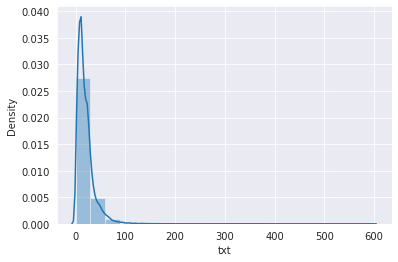

In [41]:
#Plotting text word count
sns.set_style("darkgrid")
sns.distplot(seqlen_text,bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='txt', ylabel='Density'>

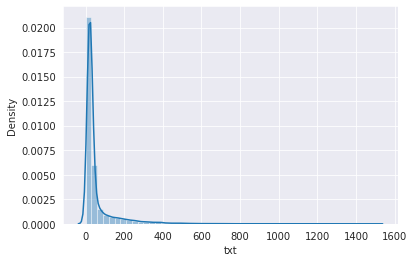

In [42]:
#Plotting experience word count
sns.distplot(seqlen_experience)

In [43]:
max_len_text=15
max_len_experience=125

In [44]:
#Converting train  into sequences
X_text_seq = pad_sequences(X_text_train['seq'], maxlen = max_len_text, padding = 'pre', truncating='post')
X_experience_seq=pad_sequences(X_experience_train['seq'], maxlen = max_len_experience, padding = 'pre', truncating='post')

In [45]:
#Converting test into sequence
X_text_seq_test = pad_sequences(X_text_test['seq'], maxlen = max_len_text, padding = 'pre', truncating='post')
X_experience_seq_test=pad_sequences(X_experience_test['seq'], maxlen = max_len_experience, padding = 'pre', truncating='post')

In [46]:
vocab_size_text = len(tokenizer_text.word_index) + 1
vocab_size_experience = len(tokenizer_experience.word_index) + 1

In [47]:
print(vocab_size_text,vocab_size_experience)

9350 37681


In [48]:
#Extracting glove vectors
from tqdm import tqdm
embedding_vector = {}
f = open('../input/glove840b300dtxt/glove.840B.300d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:], dtype = 'float32')
    embedding_vector[word] = coef

2196018it [03:00, 12180.63it/s]


In [49]:
#Embedding for text
oov_text=[]
embedding_matrix_text = np.zeros((vocab_size_text, 300))
for word, i in tqdm(tokenizer_text.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
      embedding_matrix_text[i] = embedding_value
    else:
      oov_text.append(word)

100%|██████████| 9349/9349 [00:00<00:00, 199755.22it/s]


In [42]:
#Embedding for experience
oov_experience=[]
embedding_matrix_experience = np.zeros((vocab_size_experience, 300))
for word, i in tqdm(tokenizer_experience.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
      embedding_matrix_experience[i] = embedding_value
    else:
      oov_experience.append(word)

100%|██████████| 37680/37680 [00:00<00:00, 292389.82it/s]


In [43]:
def create_model():
    text_input = Input(shape=(None,), name="text")
    experience_input = Input(shape=(None,), name="experience") 
    text_features = Embedding(vocab_size_text, 300, weights = [embedding_matrix_text], input_length = max_len_text, trainable = False)(text_input)
    experience_features = Embedding(vocab_size_experience, 300, weights = [embedding_matrix_experience], input_length = max_len_experience, trainable = False)(experience_input)
    text_features = SimpleRNN(64,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(text_features)
    experience_features = SimpleRNN(128,kernel_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.01))(experience_features)
    x = concatenate([text_features, experience_features])
    sd_pred = Dense(1, activation='sigmoid',name='Software_Developer',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    fd_pred = Dense(1, activation='sigmoid',name='Front_End_Developer',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    na_pred = Dense(1, activation='sigmoid',name='Network_Administrator',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    wd_pred = Dense(1, activation='sigmoid',name='Web_Developer',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    pm_pred = Dense(1, activation='sigmoid',name='Project_manager',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    da_pred = Dense(1, activation='sigmoid',name='Database_Administrator',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    sa_pred = Dense(1, activation='sigmoid',name='Security_Analyst',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    sysadmin_pred = Dense(1, activation='sigmoid',name='Systems_Administrator',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    pd_pred = Dense(1, activation='sigmoid',name='Python_Developer',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)
    jd_pred = Dense(1, activation='sigmoid',name='Java_Developer',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01))(x)


    
    model = Model(inputs=[text_input, experience_input],outputs=[sd_pred,fd_pred,na_pred,wd_pred,pm_pred,da_pred,sa_pred,sysadmin_pred,pd_pred,jd_pred])
    return model

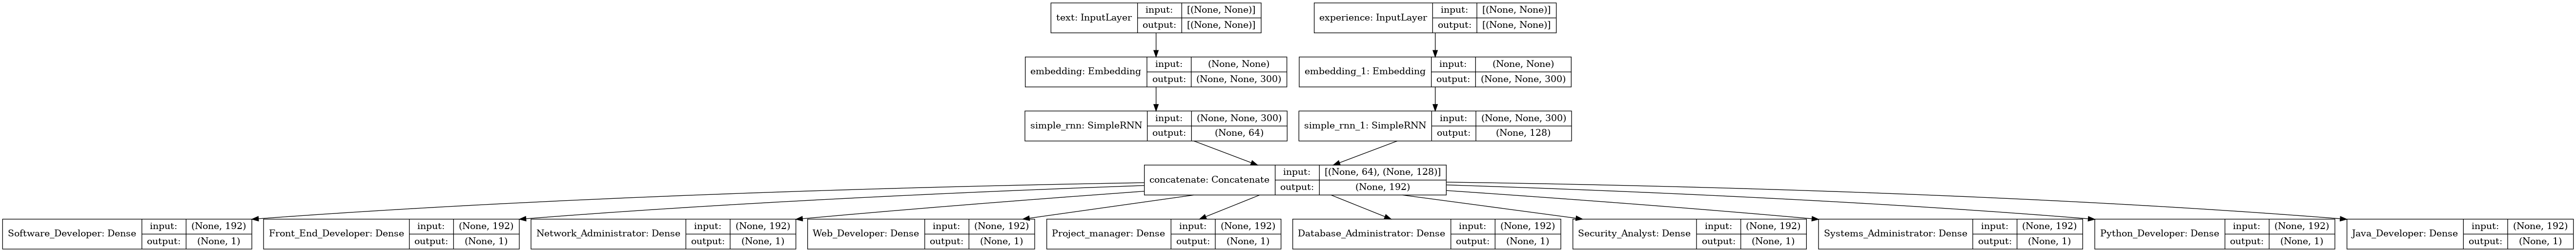

In [44]:
model=create_model()
plot_model(model, "multi_label_classification_model.png", show_shapes=True)


In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
experience (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    2805000     text[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 300)    11304300    experience[0][0]                 
______________________________________________________________________________________________

In [46]:
model.compile(
    optimizer=Adam(),
    loss=BinaryFocalLoss(gamma=2),
    metrics=['accuracy'],
#     loss_weights={'CS': 0.2, 'PH':0.2, 'MATH': 0.3, 'STAT': 0.4, 'QB': 1.0, 'QF': 1.0}
)

In [47]:
callbacks = [EarlyStopping(monitor='val_loss', patience=4)]

history = model.fit({"text": X_text_seq, "experience": X_experience_seq}, 
                    {'Software_Developer': y_train.iloc[:,0],
'Front_End_Developer': y_train.iloc[:,1],
'Network_Administrator': y_train.iloc[:,2],
'Web_Developer': y_train.iloc[:,3],
'Project_manager': y_train.iloc[:,4],
'Database_Administrator': y_train.iloc[:,5],
'Security_Analyst': y_train.iloc[:,6],
'Systems_Administrator': y_train.iloc[:,7],
'Python_Developer': y_train.iloc[:,8],
'Java_Developer': y_train.iloc[:,9]},
                    epochs = 10,
                    validation_data =({"text": X_text_seq_test, "experience": X_experience_seq_test} ,
                                      {'Software_Developer': y_test.iloc[:,0],
'Front_End_Developer': y_test.iloc[:,1],
'Network_Administrator': y_test.iloc[:,2],
'Web_Developer': y_test.iloc[:,3],
'Project_manager': y_test.iloc[:,4],
'Database_Administrator': y_test.iloc[:,5],
'Security_Analyst': y_test.iloc[:,6],
'Systems_Administrator': y_test.iloc[:,7],
'Python_Developer': y_test.iloc[:,8],
'Java_Developer': y_test.iloc[:,9]}),
                    callbacks=callbacks,
                    verbose=2
                   )

Epoch 1/10
637/637 - 49s - loss: 1.6826 - Software_Developer_loss: 0.0878 - Front_End_Developer_loss: 0.0792 - Network_Administrator_loss: 0.0847 - Web_Developer_loss: 0.1107 - Project_manager_loss: 0.0969 - Database_Administrator_loss: 0.0763 - Security_Analyst_loss: 0.0677 - Systems_Administrator_loss: 0.1035 - Python_Developer_loss: 0.0626 - Java_Developer_loss: 0.0646 - Software_Developer_accuracy: 0.8670 - Front_End_Developer_accuracy: 0.8714 - Network_Administrator_accuracy: 0.8621 - Web_Developer_accuracy: 0.7889 - Project_manager_accuracy: 0.8535 - Database_Administrator_accuracy: 0.9047 - Security_Analyst_accuracy: 0.9077 - Systems_Administrator_accuracy: 0.8249 - Python_Developer_accuracy: 0.9208 - Java_Developer_accuracy: 0.9092 - val_loss: 1.0886 - val_Software_Developer_loss: 0.0741 - val_Front_End_Developer_loss: 0.0689 - val_Network_Administrator_loss: 0.0721 - val_Web_Developer_loss: 0.1003 - val_Project_manager_loss: 0.0854 - val_Database_Administrator_loss: 0.0616 - v

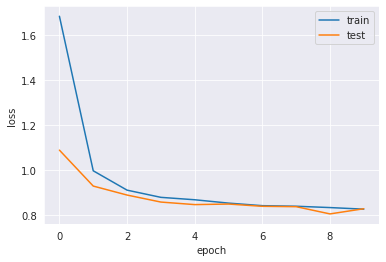

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.text('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [49]:
y_pred=model.predict({"text": X_text_seq_test, "experience": X_experience_seq_test})

In [50]:
categories=Y.columns

In [51]:
categories

Index(['Software_Developer', 'Front_End_Developer', 'Network_Administrator',
       'Web_Developer', 'Project_manager', 'Database_Administrator',
       'Security_Analyst', 'Systems_Administrator', 'Python_Developer',
       'Java_Developer'],
      dtype='object')

In [52]:
#Converting y_pred to suitable format
y_dict={"0":y_pred[0][:].flatten(),"1":y_pred[1][:].flatten(),'2':y_pred[2][:].flatten(),'3':y_pred[3][:].flatten(),'4':y_pred[4][:].flatten(),'5':y_pred[5][:].flatten(),"6":y_pred[6][:].flatten(),"7":y_pred[7][:].flatten(),'8':y_pred[8][:].flatten(),'9':y_pred[9][:].flatten()}

In [53]:
y_df=pd.DataFrame.from_dict(y_dict)

In [54]:
y_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.426336,0.254458,0.211766,0.311816,0.538717,0.393882,0.287654,0.221525,0.160919,0.196062
1,0.297817,0.127970,0.344701,0.189779,0.411922,0.267570,0.418702,0.441928,0.230563,0.235340
2,0.769885,0.299562,0.170510,0.371288,0.211099,0.207783,0.210201,0.211992,0.688815,0.313887
3,0.510362,0.254867,0.273884,0.328713,0.349472,0.307680,0.210026,0.297956,0.240289,0.223505
4,0.794099,0.405203,0.182815,0.451438,0.233506,0.188065,0.162520,0.180175,0.495985,0.362323


In [55]:
y_df.columns=Y.columns

In [56]:
y_df

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
0,0.426336,0.254458,0.211766,0.311816,0.538717,0.393882,0.287654,0.221525,0.160919,0.196062
1,0.297817,0.127970,0.344701,0.189779,0.411922,0.267570,0.418702,0.441928,0.230563,0.235340
2,0.769885,0.299562,0.170510,0.371288,0.211099,0.207783,0.210201,0.211992,0.688815,0.313887
3,0.510362,0.254867,0.273884,0.328713,0.349472,0.307680,0.210026,0.297956,0.240289,0.223505
4,0.794099,0.405203,0.182815,0.451438,0.233506,0.188065,0.162520,0.180175,0.495985,0.362323
...,...,...,...,...,...,...,...,...,...,...
5092,0.774652,0.318528,0.147191,0.398355,0.211854,0.232470,0.216713,0.192330,0.601676,0.364494
5093,0.745595,0.496478,0.208415,0.530009,0.263758,0.206116,0.131659,0.216763,0.230498,0.234955
5094,0.403478,0.212791,0.289921,0.256563,0.578331,0.225003,0.324744,0.283728,0.208077,0.176003
5095,0.355531,0.203448,0.253424,0.267305,0.522288,0.470611,0.291383,0.269737,0.213507,0.161010


In [57]:
#Function to find  balanced value for precesion and recall
def find_threshold(y_test,y_prob):
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, marker='.', label='Model')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    #Find best threshold
    min_diff=1
    for i in range(len(recall)):
        diff=abs(recall[i] -precision[i])
        if diff<min_diff:
            min_diff=diff
            best_threshold=thresholds[i]
            index=i
            
    print(f'Precision and Recall for threshold {best_threshold} = {precision[index]} and {recall[index]}')
    
    return best_threshold

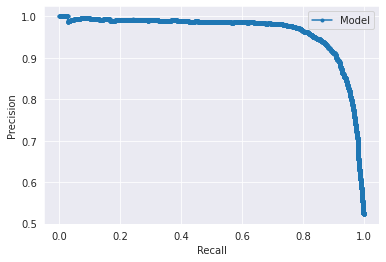

Precision and Recall for threshold 0.5119706988334656 = 0.9077743902439024 and 0.9077743902439024


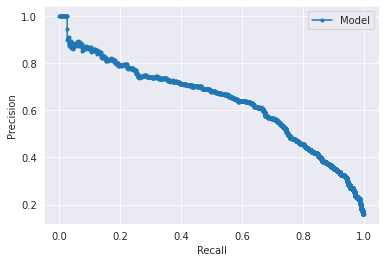

Precision and Recall for threshold 0.42807823419570923 = 0.6296829971181557 and 0.6296829971181557


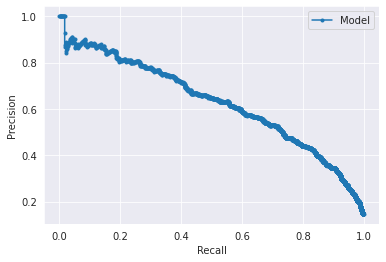

Precision and Recall for threshold 0.39805325865745544 = 0.5986394557823129 and 0.5986394557823129


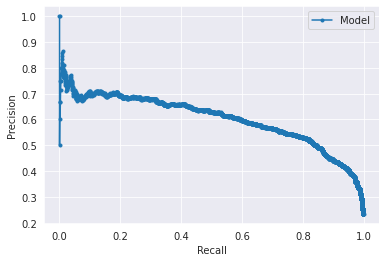

Precision and Recall for threshold 0.4478684663772583 = 0.597623089983022 and 0.597623089983022


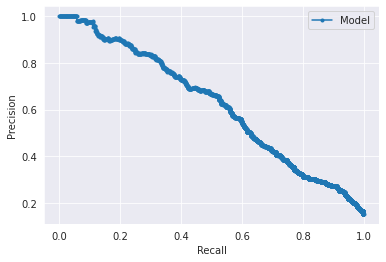

Precision and Recall for threshold 0.43443429470062256 = 0.5749039692701664 and 0.5749039692701664


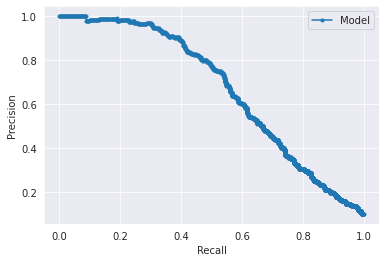

Precision and Recall for threshold 0.3929722011089325 = 0.6015625 and 0.6015625


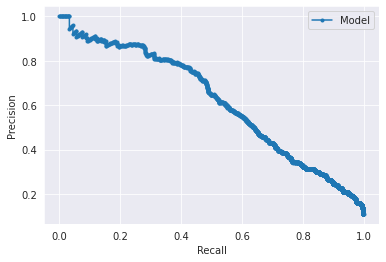

Precision and Recall for threshold 0.4089905023574829 = 0.5730994152046783 and 0.5730994152046783


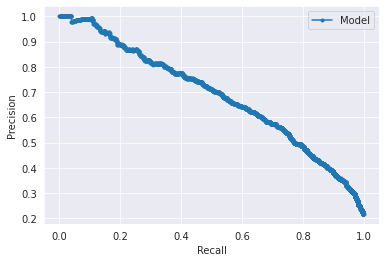

Precision and Recall for threshold 0.3965704143047333 = 0.6248839368616528 and 0.6248839368616528


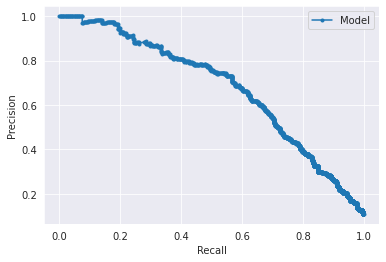

Precision and Recall for threshold 0.4905332922935486 = 0.6278538812785388 and 0.6278538812785388


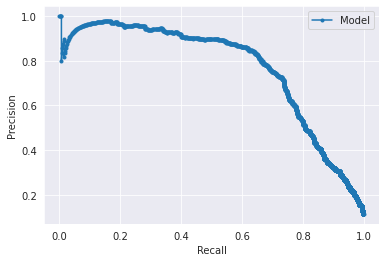

Precision and Recall for threshold 0.4128645062446594 = 0.7290209790209791 and 0.7290209790209791


In [58]:
threshold_sd = find_threshold(y_test['Software_Developer'],y_df['Software_Developer'])
threshold_fd = find_threshold(y_test['Front_End_Developer'],y_df['Front_End_Developer'])
threshold_na = find_threshold(y_test['Network_Administrator'],y_df['Network_Administrator'])
threshold_wd = find_threshold(y_test['Web_Developer'],y_df['Web_Developer'])
threshold_pm = find_threshold(y_test['Project_manager'],y_df['Project_manager'])
threshold_da = find_threshold(y_test['Database_Administrator'],y_df['Database_Administrator'])
threshold_sa = find_threshold(y_test['Security_Analyst'],y_df['Security_Analyst'])
threshold_sysadmin = find_threshold(y_test['Systems_Administrator'],y_df['Systems_Administrator'])
threshold_pd = find_threshold(y_test['Python_Developer'],y_df['Python_Developer'])
threshold_jd = find_threshold(y_test['Java_Developer'],y_df['Java_Developer'])

In [59]:
y_pred=y_df.copy()

In [60]:
#From the above precision recall curve selected threshold values
y_pred['Software_Developer']=np.where(y_pred['Software_Developer']>=threshold_sd,1,0)
y_pred['Front_End_Developer']=np.where(y_pred['Front_End_Developer']>=threshold_fd,1,0)
y_pred['Network_Administrator']=np.where(y_pred['Network_Administrator']>=threshold_na,1,0)
y_pred['Web_Developer']=np.where(y_pred['Web_Developer']>=threshold_wd,1,0)
y_pred['Project_manager']=np.where(y_pred['Project_manager']>=threshold_pm,1,0)
y_pred['Database_Administrator']=np.where(y_pred['Database_Administrator']>=threshold_da,1,0)
y_pred['Security_Analyst']=np.where(y_pred['Security_Analyst']>=threshold_sa,1,0)
y_pred['Systems_Administrator']=np.where(y_pred['Systems_Administrator']>=threshold_sysadmin,1,0)
y_pred['Python_Developer']=np.where(y_pred['Python_Developer']>=threshold_pd,1,0)
y_pred['Java_Developer']=np.where(y_pred['Java_Developer']>=threshold_jd,1,0)

In [61]:
y_pred.describe()

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000
mean,0.514813,0.136159,0.144202,0.231116,0.153227,0.100451,0.100647,0.211301,0.085933,0.112223
std,0.499830,0.342990,0.351329,0.421588,0.360242,0.300630,0.300891,0.408271,0.280292,0.315671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
print(classification_report(y_test,y_pred,target_names=categories));

                        precision    recall  f1-score   support

    Software_Developer       0.91      0.91      0.91      2624
   Front_End_Developer       0.63      0.63      0.63       694
 Network_Administrator       0.60      0.60      0.60       735
         Web_Developer       0.60      0.60      0.60      1178
       Project_manager       0.57      0.57      0.57       781
Database_Administrator       0.60      0.60      0.60       512
      Security_Analyst       0.57      0.57      0.57       513
 Systems_Administrator       0.62      0.62      0.62      1077
      Python_Developer       0.63      0.63      0.63       438
        Java_Developer       0.73      0.73      0.73       572

             micro avg       0.70      0.70      0.70      9124
             macro avg       0.65      0.65      0.65      9124
          weighted avg       0.70      0.70      0.70      9124
           samples avg       0.67      0.69      0.65      9124



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
accuracy_score(y_test,y_pred)

0.30998626643123406

In [64]:
average_precision_score(y_test,y_pred)

0.4811616639240719

In [65]:
text = 'An Empirical Study of DeFi Liquidations:Incentives, Risks, and Instabilities'
text_input = pd.Series(text)
text_input,_=pp_text.preprocess(text_input,training=False)
text_input= pad_sequences(text_input['seq'], maxlen = max_len_text, padding = 'pre', truncating='post')

In [66]:
experience = '''Instructor Hunter College CUNY - New York NY June 2019 to Present Wrote and taught curriculum to prepare college students for technical interviews Volunteer Coalition of Concerned Legal Professionals - Bronx NY March 2018 to Present Advocated for people that needed legal advice recruited volunteers and assisted in office renovations Software Developer CUNY Tech Prep - New York NY September 2017 to March 2018 Student Researcher MSK Cancer Center - New York NY June 2017 to August 2017  Organized existing codebase for semi-automatic segmentation into a library  Implemented segmentation algorithms from new research papers  Learned new image processing/segmentation material independently during employment while handling other duties Education Bachelors of Science in Computer Science The City University of New York City College May 2015 to September 2018 Skills C Git Html Javascript Node.js Python Mysql Postgresql Sql Sqlite Bash Linux Css Vhdl Links http//www.linkedin.com/in/adam-ibrahim http//github.com/beelzebielsk Additional Information Technical Skills Programming Python C Javascript Racket Bash HTML CSS SQL VHDL Technologies VIM Linux Node.js Windows Git/Github MySQL PostgreSQL SQLite
'''
experience_input = pd.Series(experience)
experience_input, _ = pp_experience.preprocess(experience_input, training=False)
experience_input= pad_sequences(experience_input['seq'], maxlen = max_len_experience, padding = 'pre', truncating='post')

In [67]:
y_probs=model.predict({"text": text_input, "experience": experience_input})

In [68]:
y_dict={"0":y_probs[0][:].flatten(),"1":y_probs[1][:].flatten(),'2':y_probs[2][:].flatten(),'3':y_probs[3][:].flatten(),'4':y_probs[4][:].flatten(),'5':y_probs[5][:].flatten(),"6":y_probs[6][:].flatten(),"7":y_probs[7][:].flatten(),'8':y_probs[8][:].flatten(),'9':y_probs[9][:].flatten()}

In [69]:
y_probs=pd.DataFrame.from_dict(y_dict)

In [70]:
y_probs.columns=Y.columns

In [71]:
y_probs

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
0,0.628417,0.276956,0.20239,0.326391,0.268406,0.249092,0.309773,0.211229,0.411862,0.338433


In [72]:
#From the above precision recall curve selected threshold values
y_pred['Software_Developer']=np.where(y_pred['Software_Developer']>=threshold_sd,1,0)
y_pred['Front_End_Developer']=np.where(y_pred['Front_End_Developer']>=threshold_fd,1,0)
y_pred['Network_Administrator']=np.where(y_pred['Network_Administrator']>=threshold_na,1,0)
y_pred['Web_Developer']=np.where(y_pred['Web_Developer']>=threshold_wd,1,0)
y_pred['Project_manager']=np.where(y_pred['Project_manager']>=threshold_pm,1,0)
y_pred['Database_Administrator']=np.where(y_pred['Database_Administrator']>=threshold_da,1,0)
y_pred['Security_Analyst']=np.where(y_pred['Security_Analyst']>=threshold_sa,1,0)
y_pred['Systems_Administrator']=np.where(y_pred['Systems_Administrator']>=threshold_sysadmin,1,0)
y_pred['Python_Developer']=np.where(y_pred['Python_Developer']>=threshold_pd,1,0)
y_pred['Java_Developer']=np.where(y_pred['Java_Developer']>=threshold_jd,1,0)

In [73]:
y_probs

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
0,0.628417,0.276956,0.20239,0.326391,0.268406,0.249092,0.309773,0.211229,0.411862,0.338433
